<a href="https://colab.research.google.com/github/dudgus7477/datascience/blob/main/26.%20(%EC%8B%A4%EC%8A%B5%EC%9A%A9)%20CNN%20%EC%8B%A4%EC%8A%B5(%EA%B0%9C%EC%99%80%20%EA%B3%A0%EC%96%91%EC%9D%B4%20%EB%B6%84%EB%A5%98).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 런타임 유형 변경 필수: GPU 사용

### 데이터 로드
- 공유(링크가 있는 모든 사용자-편집자)링크 생성

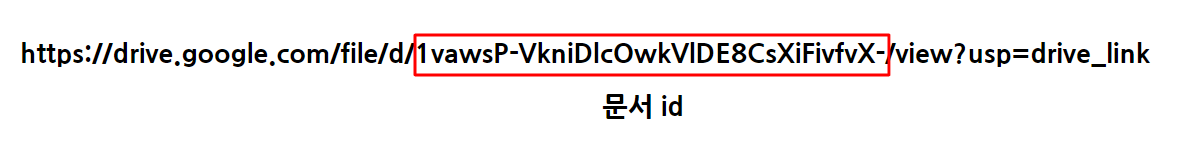

In [1]:
# 개와 고양 데이터 출처: https://www.kaggle.com/datasets/tongpython/cat-and-dog
# !gdown https://drive.google.com/uc?id=<문서id>

!gdown https://drive.google.com/uc?id=

In [2]:
# .zip파일 압축 해제
!unzip *.zip && rm *.zip

In [3]:
from tensorflow.keras.utils import load_img, img_to_array
import matplotlib.pyplot as plt

img = load_img('',
               target_size=(100,100))
plt.imshow(img)
plt.show()

In [4]:
#이미지 데이터 배열로 변환
processed_img = img_to_array(img)
print(processed_img)
print(processed_img.shape)

In [5]:
img = load_img('',
               target_size=(100,100), color_mode='grayscale')
plt.imshow(img) # 흑백 이미지를 보기 편하도록 보정
plt.imshow(img, cmap='gray') # 흑백으로 출력
plt.show()
print(img_to_array(img).shape)
print(img_to_array(img))

In [ ]:
import sys
import os

train_path = '/content/training_set/training_set/'
class_name = ['cats', 'dogs']

# .jpg 파일을 찾아서 리스트로 만드는 함수
def fileList(dir, format='.jpg'):
    filelist = []
    for root, dirs, files in os.walk(dir, topdown=False):
        for name in files:
            if name.endswith(format):
                fullname = os.path.join(root, name)
                filelist.append(fullname)
        return filelist

In [6]:
import numpy as np
num_img = 0
for name in class_name:
    my_file_list = fileList(train_path+name)
    num_img = num_img + len(my_file_list)
    print(f'{name}의 이미지 수는 {len(my_file_list)}')
print(f'총 이미지 수는 {num_img}입니다.')

### CNN 미적용

In [7]:
# 각 폴더의 개별 이미지 파일을 행렬로 변환하고, 모두 합쳐 하나의 행렬 생성
import numpy as np

arr_list = []

for name in class_name:
    my_file_list = fileList(train_path + name)
    for file_name in my_file_list:
        img = load_img(file_name, target_size=(100, 100), color_mode='grayscale')
        img_arr = img_to_array(img).astype(int)
        arr_list.append(img_arr)

arr = np.array(arr_list)  # 최종 변환 (shape: (n, 100, 100, 1))
print(arr.shape)

In [8]:
arr = arr.reshape(-1,10000)
print(arr.shape)
print(arr)

In [9]:
#이미지로 확인
arr_img = img_to_array(arr[567].reshape(100,100,1))
plt.imshow(arr_img)
plt.imshow(arr_img, cmap='gray')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

train_scaled = arr / 255
train_target = np.array([0]* + [1]* )

In [2]:
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled,train_target,
                                                                      shuffle=True, stratify=train_target,
                                                                      test_size=0.3, random_state=34)

#print(train_scaled.shape, val_scaled.shape)
#print(train_target.shape, val_target.shape)

In [ ]:
# CNN 미적용 model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model=Sequential()
model.add(Dense(2048,input_dim= ,activation='relu'))
model.add(Dense(2048,activation='relu'))
model.add(Dense(2048,activation='relu'))
model.add(Dense(2048,activation='relu'))
model.add(Dense(2048,activation='relu'))
model.add(Dense(2048,activation='relu'))
model.add(Dense(1024,activation='relu'))
model.add(Dense(512,activation='relu'))
model.add(Dense( ,activation='softmax'))

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [3]:
# 런타임 유형을 GPU로 변경하고 실행
# CNN 미적용 학습
train=model.fit(train_scaled,train_target,
                epochs=10,batch_size=10,verbose=1,
                validation_data=(val_scaled,val_target))

In [4]:
#plt.plot(train.history['loss'])
#plt.plot(train.history['val_loss'])
#plt.xlabel('epoch')
#plt.ylabel('loss')
#plt.legend(['train','val'])
#plt.show()

In [5]:
# 새로운 포도 이미지로 맛 예측하기
test_path = ''
class_name = ['cats', 'dogs']

test_num_img = 0

for name in class_name:
    my_file_list = fileList(test_path + name)
    test_num_img = test_num_img + len(my_file_list)
    print(f'{name}의 이미지 수는 {len(my_file_list)}입니다.')
print(f'총 이미지 수는 {test_num_img}입니다.')

In [6]:
#폴더에 있는 테스트 데이터도 리스트로 저장하기
test_arr_list = []

for name in class_name:
    my_file_list = fileList(test_path + name)
    for file_name in my_file_list:
        img = load_img(file_name, target_size=(100,100), color_mode='grayscale')
        img_arr = img_to_array(img)
        test_arr_list.append(img_arr)

test_arr = np.array(test_arr_list).astype(int)
print(test_arr.shape)

In [7]:
# 리스트 형태 바꾸기
test_arr = test_arr.reshape(-1,10000)
print(test_arr.shape)
print(test_arr)

In [9]:
import random as rn

test_arr_scaled = test_arr / 255.
tastes = ['cats', 'dogs']

for i in range(10):
    index = rn.randint(0, len(test_arr))
    preds_last = model.predict(test_arr_scaled[index:index+1])
    print(f'{index}번째의 예측 인덱스는 {np.argmax(preds_last)}입니다.')
    print(f'{index}번째는 {tastes[np.argmax(preds_last)]}입니다.\n')

### CNN 적용

In [10]:
# 각 폴더의 개별 이미지 파일을 행렬로 변환하고, 모두 합쳐 하나의 행렬 생성
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array

arr_list = []

for name in class_name:
    my_file_list = fileList(train_path + name)
    for file_name in my_file_list:
        img = load_img(file_name, target_size=(100, 100), color_mode='grayscale')
        img_arr = img_to_array(img).astype(int)
        arr_list.append(img_arr)

arr = np.array(arr_list)  # 최종 변환 (shape: (n, 100, 100, 1))
print(arr.shape)

In [11]:
from tensorflow.keras.utils import array_to_img

arr_img = array_to_img(arr[567])
plt.imshow(arr_img)
plt.imshow(arr_img, cmap='gray')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

train_scaled = arr / 255
train_target = np.array([0]*4000 + [1]*4005)

In [12]:
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled,train_target,
                                                                      shuffle=True, stratify=train_target,
                                                                      test_size=0.3, random_state=34)

print(train_scaled.shape, val_scaled.shape)
print(train_target.shape, val_target.shape)

In [1]:
# CNN 적용

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

model_CNN = Sequential()
model_CNN.add( (filters=32, kernel_size=(3,3),
                              activation='relu', padding='same',
                              input_shape=(100,100,1)))
model_CNN.add( (pool_size=(2,2)))
model_CNN.add( (filters=64, kernel_size=(3,3),
                              activation='relu', padding='same'))
model_CNN.add( (pool_size=(2,2)))
model_CNN.add( ())
model_CNN.add( (100, activation='relu'))
model_CNN.add( (0.2))
model_CNN.add( (6, activation='softmax'))

model_CNN.compile(optimizer='adam',loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [2]:
# 런타임 유형을 GPU로 변경하고 실행
# CNN 적용 학습
train=model_CNN.fit(train_scaled,train_target,
                epochs=10,batch_size=10,verbose=1,
                validation_data=(val_scaled,val_target))

In [3]:
plt.plot(train.history['loss'])
plt.plot(train.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

In [ ]:
print("\n Test Accuracy: %.4f" % (model_CNN.evaluate(val_scaled, val_target)[1]))

In [4]:
# 새로운 이미지 예측하기
test_path = ''
class_name = ['cats', 'dogs']

test_num_img = 0

for name in class_name:
    my_file_list = fileList(test_path + name)
    test_num_img = test_num_img + len(my_file_list)
    print(f'{name}의 이미지 수는 {len(my_file_list)}입니다.')
print(f'총 이미지 수는 {test_num_img}입니다.')

In [5]:
test_arr_list = []

for name in class_name:
    my_file_list = fileList(test_path + name)
    for file_name in my_file_list:
        img = load_img(file_name, target_size=(100,100), color_mode='grayscale')
        img_arr = img_to_array(img)
        test_arr_list.append(img_arr)

test_arr = np.array(test_arr_list).astype(int)
print(test_arr.shape)


In [6]:
import random as rn

test_arr_scaled = test_arr / 255.
tastes = ['cats', 'dogs']

for i in range(10):
    index = rn.randint(0, len(test_arr))
    preds_last = model_CNN.predict(test_arr_scaled[index:index+1])
    print(f'{index}번째의 예측 인덱스는 {np.argmax(preds_last)}입니다.')
    print(f'{index}번째는 {tastes[np.argmax(preds_last)]}입니다.\n')

In [7]:
#체크해보기
from tensorflow.keras.utils import array_to_img

arr_img = array_to_img(arr[])
plt.imshow(arr_img)
plt.imshow(arr_img, cmap='gray')
plt.show()